In [23]:
import numpy as np
import pandas as pd

In [24]:
sr = 10   # down sampling rate from MIDI to time axis

In [116]:
path="outputs/"
#target="bac-inv001-o-p1.csv"
target="bac-wtc101-p-a-p1.csv"
df=pd.read_csv(path+target)
display(df[73:90])

type  time  control  value  channel  time_counter  note  \
73         note_on   383      NaN    NaN        0         49825  60.0   
74  control_change    19     64.0   75.0        0         49844   NaN   
75  control_change   365     64.0   71.0        0         50209   NaN   
76  control_change   384     64.0   71.0        0         50593   NaN   
77  control_change   384     64.0   73.0        0         50977   NaN   
78  control_change   384     64.0   75.0        0         51361   NaN   
79  control_change   384     64.0   79.0        0         51745   NaN   
80  control_change   383     64.0   83.0        0         52128   NaN   
81  control_change   385     64.0   87.0        0         52513   NaN   
82  control_change   384     64.0   91.0        0         52897   NaN   
83  control_change   384     64.0   93.0        0         53281   NaN   
84  control_change   365     64.0   96.0        0         53646   NaN   
85  control_change   384     64.0   98.0        0         54030   NaN   
86  control_change   384     64.0  101.0        0         54414   NaN   
87  control_change   384     64.0  103.0        0         54798   NaN   
88  control_change   384     64.0  105.0        0         55182   NaN   
89  control_change   384     64.0  106.0        0         55566   NaN   

    velocity note_name  
73      38.0         C  
74       NaN       NaN  
75       NaN       NaN  
76       NaN       NaN  
77       NaN       NaN  
78       NaN       NaN  
79       NaN       NaN  
80       NaN       NaN  
81       NaN       NaN  
82       NaN       NaN  
83       NaN       NaN  
84       NaN       NaN  
85       NaN       NaN  
86       NaN       NaN  
87       NaN       NaN  
88       NaN       NaN  
89       NaN       NaN

In [121]:
note_on=df[df['type']=='note_on'][['time_counter','note_name','velocity']]
#note_on=note_on.reindex(index=range(len(note_on)))
display(note_on)

time_counter note_name  velocity
73           49825         C      38.0
93           57007         E      17.0
104          61710         G      28.0
108          65704         C      38.0
110          68968         E      37.0
...            ...       ...       ...
2521       2175419         C      48.0
2523       2175765         E      33.0
2525       2176014         C      22.0
2527       2176360         C      29.0
2528       2176380         G      34.0

[552 rows x 3 columns]

In [147]:
tmp_duration=pd.DataFrame(note_on.time_counter.diff().shift(-1))
tmp_duration=tmp_duration.rename(columns={"time_counter":"duration"})
df_duration=pd.concat([note_on,tmp_duration], axis=1)
df_duration.index=range(len(df_duration))

In [128]:
target=df_duration[:32]

list(target.columns)


['time_counter', 'note_name', 'velocity', 'duration']

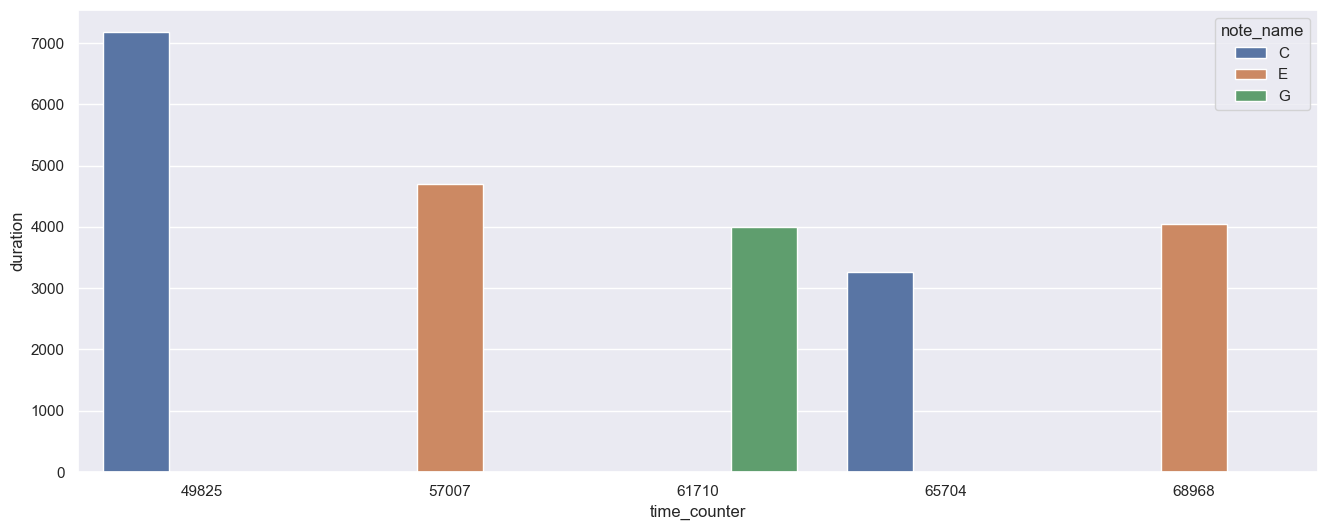

In [149]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,6)})

target=df_duration[:5]

g=sns.barplot(data=target, x="time_counter",y="duration",hue="note_name")
notes=list(target.note_name)
#g.set_xticks(range(len(notes)))
#p=g.set_xticklabels(notes)

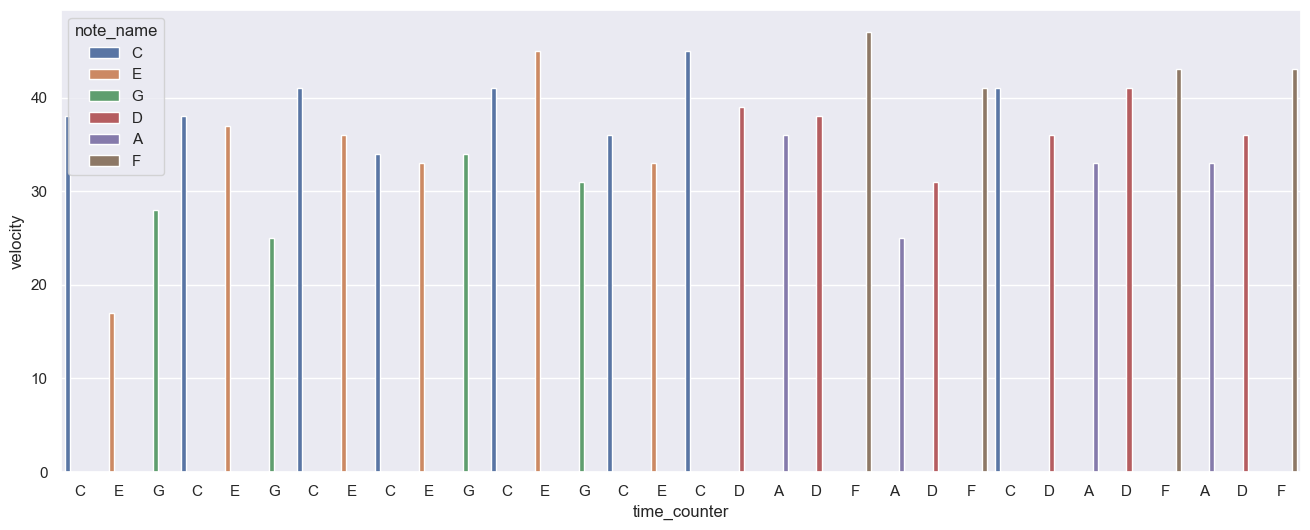

In [134]:
g=sns.barplot(data=df_duration[:32], x="time_counter",y="velocity",hue="note_name")
g.set_xticks(range(len(notes)))
p=g.set_xticklabels(notes)